In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')



In [2]:
df_o = pd.read_csv("data/Train.csv")
df_o.head(2)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0


+ DATOP - Date of flight,
+ FLTID - Flight number,
+ DEPSTN - departure destination,
+ ARRSTN - Arrival destination,
+ STD - Scheduled Time departure,
+ STA - Scheduled Time arrival,
+ STATUS - Flight status,
+ AC - Aircraft Code,

In [96]:
df = df_o.copy()
df.STD = pd.to_datetime(df.STD, format = '%Y-%m-%d %H:%M:%S') 
df.DATOP = pd.to_datetime(df.DATOP, format = '%Y-%m-%d') 
df.STA = pd.to_datetime(df.STA, format = '%Y-%m-%d %H.%M.%S') 
df['departure_time'] = df.STD.dt.hour #  * 60 + df.STD.dt.minute # departure time in minutes
df['duration'] = df.STA - df.STD
df = df[df['duration']< '1 days']
df = df[df.target < 60*12]
df['departure_month'] = df.STD.dt.month
df['departure_year'] = df.STD.dt.year
df['day_of_week'] = df.STD.dt.day_of_week
df.FLTID = df.FLTID.str.strip()
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 107022 entries, 0 to 107832
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   ID               107022 non-null  object         
 1   DATOP            107022 non-null  datetime64[ns] 
 2   FLTID            107022 non-null  object         
 3   DEPSTN           107022 non-null  object         
 4   ARRSTN           107022 non-null  object         
 5   STD              107022 non-null  datetime64[ns] 
 6   STA              107022 non-null  datetime64[ns] 
 7   STATUS           107022 non-null  object         
 8   AC               107022 non-null  object         
 9   target           107022 non-null  float64        
 10  departure_time   107022 non-null  int32          
 11  duration         107022 non-null  timedelta64[ns]
 12  departure_month  107022 non-null  int32          
 13  departure_year   107022 non-null  int32          
 14  day_of_we

In [85]:
df[df.target == 0]

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,departure_time,duration,departure_month,departure_year,day_of_week


Text(0.5, 0, 'departure_time [minutes]')

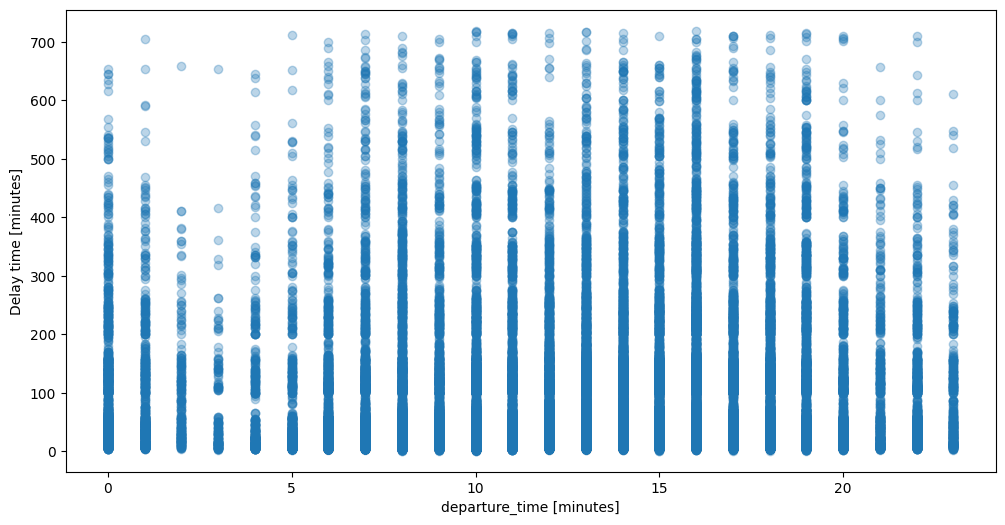

In [4]:
plt.figure(1, figsize=(12,6))
plt.scatter(df[df.target>0].departure_time, df[df.target>0].target,  alpha = 0.3)
plt.ylabel('Delay time [minutes]')
plt.xlabel('departure_time [minutes]')
# plt.legend()


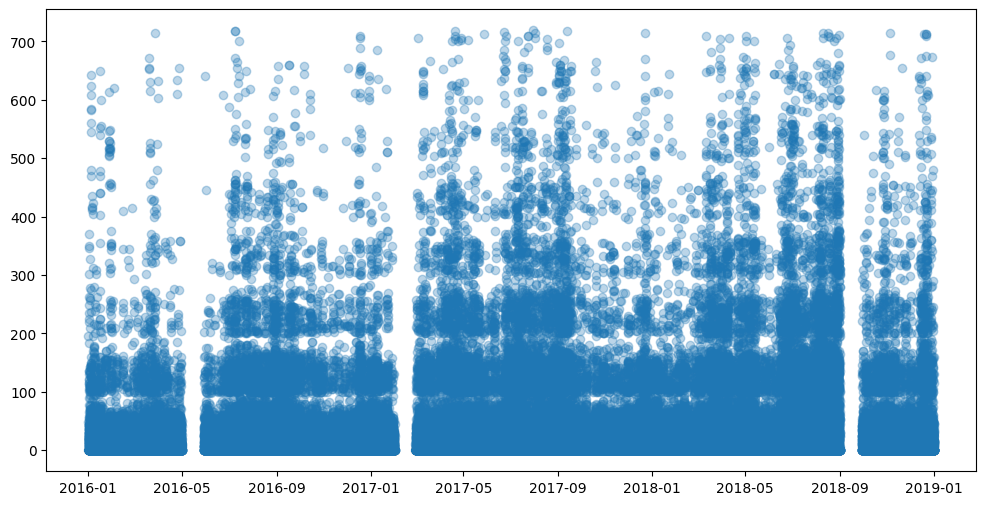

In [5]:
fig= plt.figure(1, figsize=(12,6))
plt.plot_date(df.STD, df.target, fmt='o',alpha=0.3)
# plt.plA, df.target, fmt='bo',alpha=0.2)

Text(0.5, 0, 'arrival data')

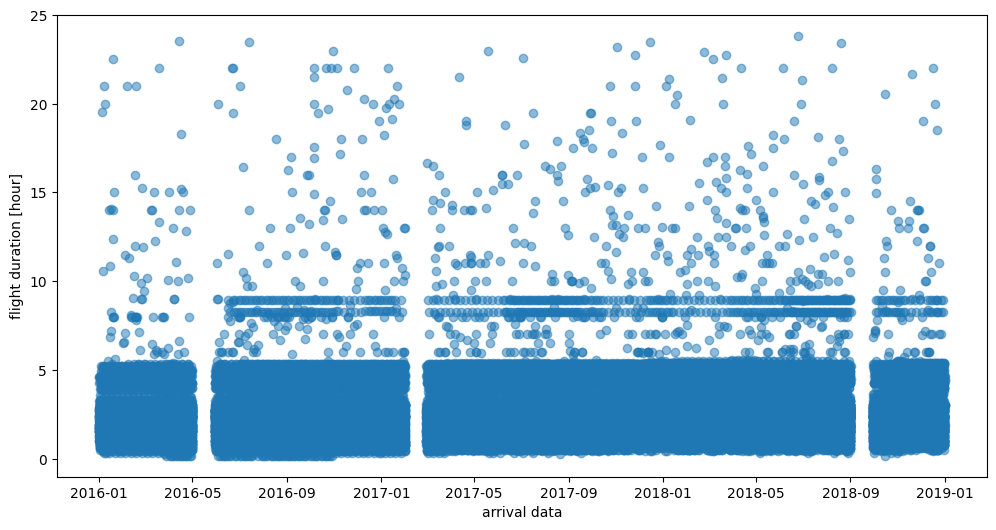

In [6]:
fig = plt.figure(1, figsize=(12,6))
plt.plot_date(df.STA, df.duration.dt.total_seconds()/3600, fmt='o',alpha=0.5)
plt.ylabel('flight duration [hour]')
plt.xlabel('arrival data')


Text(0.5, 0, 'departure_month')

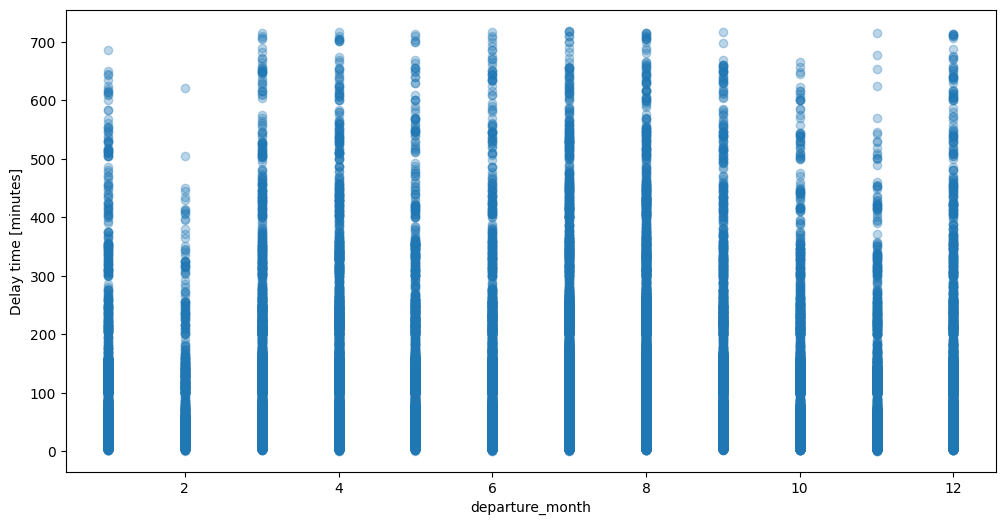

In [7]:
plt.figure(1, figsize=(12,6))
plt.scatter(df[df.target>0].departure_month, df[df.target>0].target,  alpha = 0.3)
# plt.title(label)
plt.ylabel('Delay time [minutes]')
plt.xlabel('departure_month')

In [8]:
# pd.set_option('display.max_rows', None)
df[df.STA > '2019-01-30']
# df[df.STA > '2018-12-30'].shape

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,departure_time,duration,departure_month,departure_year,day_of_week


In [9]:
# from sklearn.preprocessing import LabelEncoder
# # Label Encoding
# label_encoder = LabelEncoder()
# df['flight_id'] = label_encoder.fit_transform(df['FLTID'])
# df['departure_port'] = label_encoder.fit_transform(df['DEPSTN'])
# df['arrival_port'] = label_encoder.fit_transform(df['ARRSTN'])
# df['status'] = label_encoder.fit_transform(df['STATUS'])
# df['aircraft_code'] = label_encoder.fit_transform(df['AC'])
df['duration_min'] =df.duration.dt.total_seconds()/60


# df[df['STATUS']=='DEL'].head() #.target.unique() # #['ATA', 'DEP', 'RTR', 'SCH', 'DEL']
# # df[df['STATUS']=='ATA'].target.unique() #[['STATUS','target']]

In [10]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(df[['STATUS']])

OneHotEncoder(drop='first', sparse=False, sparse_output=False)

## choose columns 

In [121]:
from sklearn.model_selection import train_test_split
X= df[['FLTID',  'ARRSTN', 'departure_year', #'STATUS','departure_year', 'DEPSTN', 'day_of_week'
       'AC',  'departure_time',  'departure_month' #,
        ]]
# X = df[['FLTID','departure_month','AC','day_of_week']]
y=df.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

## One hot encoding

In [122]:
# one_hot_encondeing
def ohe_df(df):
    df_ohe = pd.DataFrame()
    for col in df.columns :
        oh_col = pd.get_dummies(df[col], prefix=f'{col}', dtype=int, drop_first = True)
        print(f'{col}::{oh_col.shape}')
        df_ohe = pd.concat([df_ohe, oh_col],axis =1)

    return df_ohe

In [123]:
X_ohe =ohe_df(X)

FLTID::(107022, 1829)
ARRSTN::(107022, 127)
departure_year::(107022, 2)
AC::(107022, 67)
departure_time::(107022, 23)
departure_month::(107022, 11)


In [128]:
X_ohe

,FLTID_AOG 0000,FLTID_AT 0167,FLTID_AT 0171,FLTID_AT 0606,FLTID_AT 0607,FLTID_AT 0612,FLTID_AT 0620,FLTID_AT 0621,FLTID_AT 0624,FLTID_AT 0625,...,departure_month_3,departure_month_4,departure_month_5,departure_month_6,departure_month_7,departure_month_8,departure_month_9,departure_month_10,departure_month_11,departure_month_12
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
107829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
107831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting data for testing

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.20, random_state=12)


## Trainining the model

In [125]:
#training the model
from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)

model = LinearRegression()
reg = model.fit(X_train, y_train)

In [102]:
from sklearn.metrics import mean_squared_error,r2_score
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(np.sqrt(mse))
r2_score(y_train, y_train_pred)

77.14444572835534


0.17720557763812794

In [126]:
from sklearn.metrics import mean_squared_error,r2_score
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(np.sqrt(mse))
r2_score(y_train, y_train_pred)

77.51036977241465


0.16938144134493227

In [119]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))
r2_score(y_test, y_pred)

87921119370.11865


-1.0640180683245002e+18

In [127]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))
r2_score(y_test, y_pred)

497033166417.1528


-3.400425973471629e+19